In [1]:
from collections import namedtuple
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, fbeta_score

import presentation as p

data = pd.read_csv('data/creditcard/creditcard.csv').drop_duplicates()

X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_true = train_test_split(
    X, y,
    test_size=.8,
    stratify=y,
    random_state=404
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

beta = 10
fbeta_average = 'binary'

def simple_confusion_matrix(y_true, y_pred, target):
    sns.heatmap(data=confusion_matrix(y_true, y_pred), annot=True, cmap=p.Colors.blues_c)
    plt.title(f'Confusion Matrix for Target "{target}"')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    sns.heatmap(data=confusion_matrix(y_true, y_pred), annot=True, cmap=p.Colors.purples_c)
    plt.title(f'Confusion Matrix for Target "{target}"')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

eval_result = namedtuple('EvaluationResult', ['model', 'accuracy', 'fbeta'])

def evaluate_model(model, X_test, y_true, beta=beta, average=fbeta_average, display_false_negatives=False):
    pred = model.predict(X_test)
    acc = accuracy_score(y_true, pred)
    fbeta = fbeta_score(y_true, pred, beta=beta, average=average)
    print('\n-- Testing Results --')
    print(f'Accuracy    on Verification Data:\t{acc:.6f}')
    print(f'Fbeta scroe on Verification Data:\t{fbeta:.6f}\n')
    print(classification_report(y_true, pred))
    if display_false_negatives:
        total_attacks = y_true.value_counts().iloc[1]
        confusion = confusion_matrix(y_true, pred)
        false_negatives = confusion[1, 0]
        print(f'False negatives: {false_negatives} ({100 * false_negatives / total_attacks:.3f}% out of {total_attacks} attacks, {100 * false_negatives / len(y_true):.3f}% overall)\n')
    return eval_result(model, acc, fbeta)

In [2]:
model = GaussianNB().fit(X_train_scaled, y_train)

In [3]:
result = evaluate_model(
    model=model,
    X_test=X_test_scaled,
    y_true=y_true,
    display_false_negatives=True,
    average='weighted'
)


-- Testing Results --
Accuracy    on Verification Data:	0.976848
Fbeta scroe on Verification Data:	0.976900

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226603
           1       0.06      0.85      0.11       378

    accuracy                           0.98    226981
   macro avg       0.53      0.91      0.55    226981
weighted avg       1.00      0.98      0.99    226981

False negatives: 58 (15.344% out of 378 attacks, 0.026% overall)



In [4]:
result = evaluate_model(
    model=model,
    X_test=X_test_scaled,
    y_true=y_true,
    display_false_negatives=True,
    average='binary'
)


-- Testing Results --
Accuracy    on Verification Data:	0.976848
Fbeta scroe on Verification Data:	0.746127

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226603
           1       0.06      0.85      0.11       378

    accuracy                           0.98    226981
   macro avg       0.53      0.91      0.55    226981
weighted avg       1.00      0.98      0.99    226981

False negatives: 58 (15.344% out of 378 attacks, 0.026% overall)



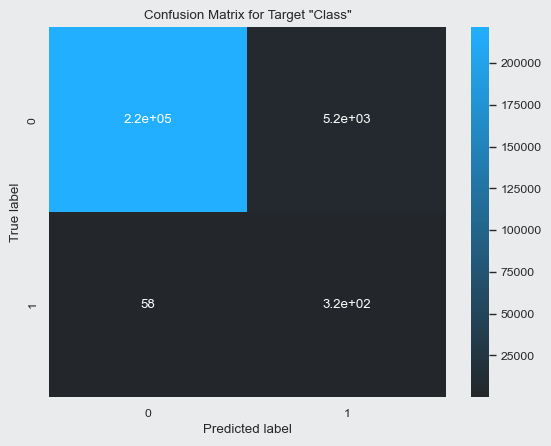

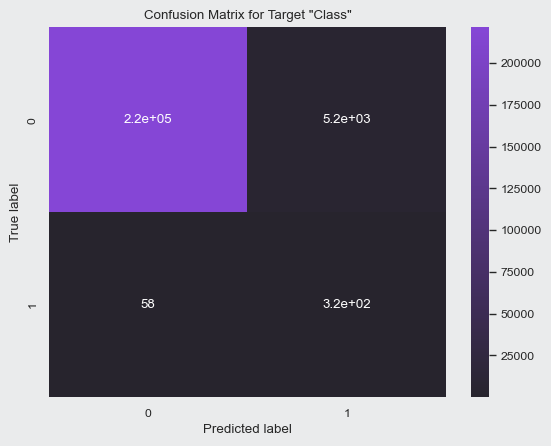

In [5]:
simple_confusion_matrix(y_true, model.predict(X_test_scaled), 'Class')